<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


<ipython-input-1-ef5ef2eb5527>:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])
<ipython-input-1-ef5ef2eb5527>:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])
<ipython-input-1-ef5ef2eb5527>:33: UserWarning: 

`distplot` is a deprecated function a

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

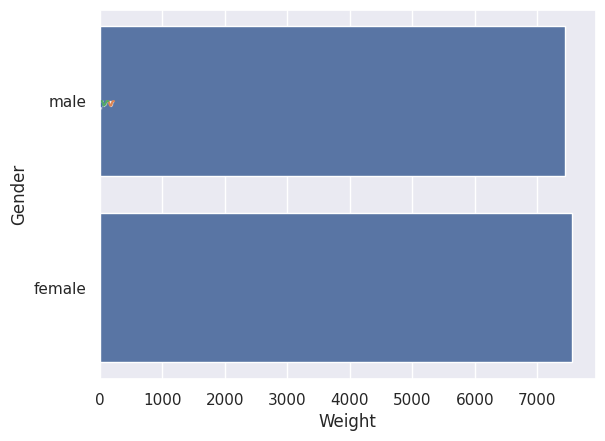

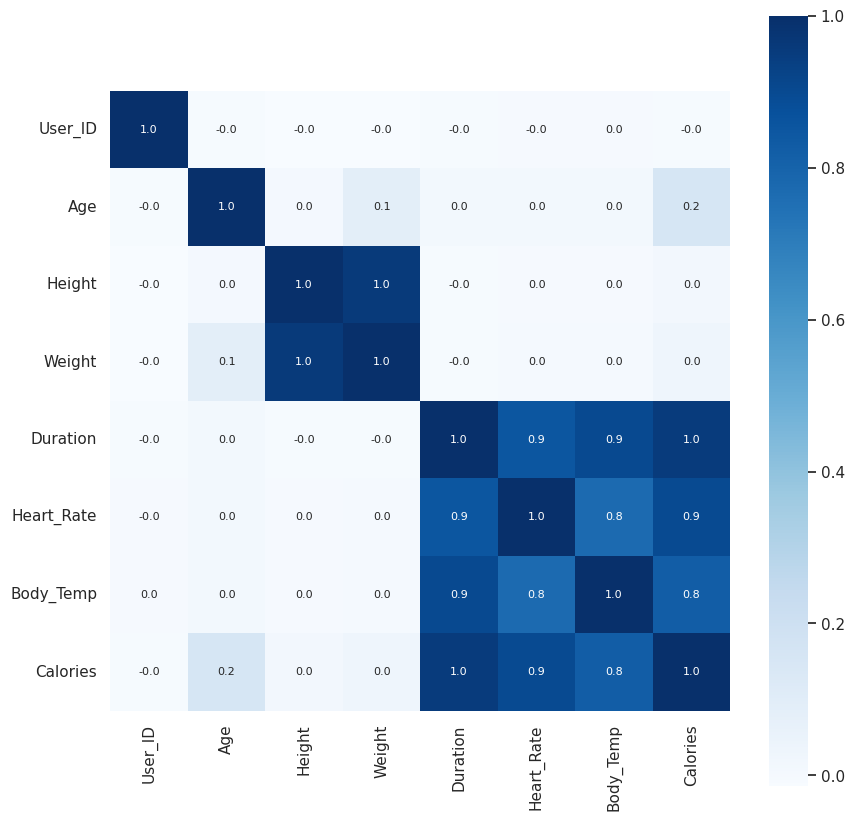

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics

# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')
# print the first 5 rows of the dataframe
calories.head()
exercise_data = pd.read_csv('/content/exercise.csv')
exercise_data.head()
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)
calories_data.head()
# checking the number of rows and columns
calories_data.shape
# getting some information about the data
calories_data.info()
# checking for missing values
calories_data.isnull().sum()
# get some statistical measures about the data
calories_data.describe()
sns.set()
# plotting the gender column in a count plot
sns.countplot(calories_data['Gender'])
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])
correlation = calories_data.corr(numeric_only=True)
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
calories_data.head()
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)



[123.04017365 173.117781    56.41704389 ... 138.00300555  22.00311932
  94.25110648]
Mean Absolute Error =  10.620614362927721
Mean Squared Error =  243.29310231858554
Root Mean Squared Error =  15.597855696171367


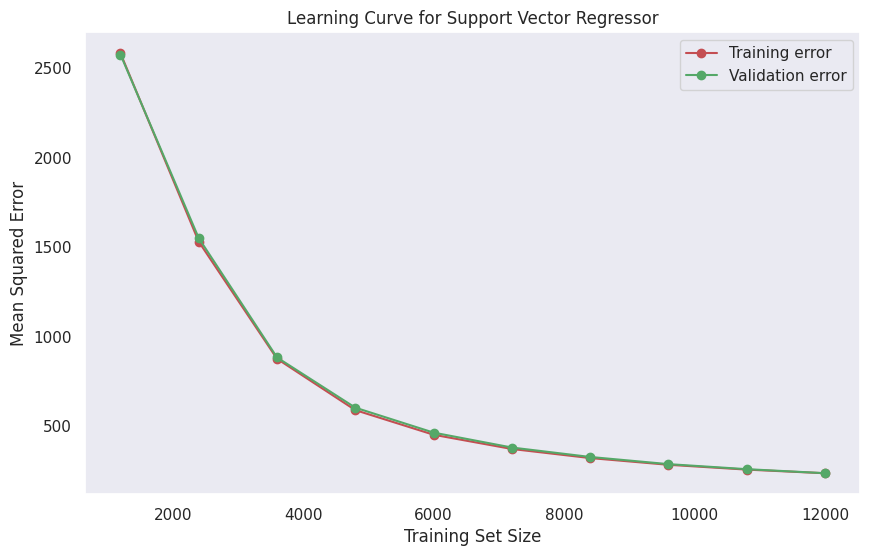

In [2]:
# loading the Support Vector Regressor model
model = SVR(kernel='rbf')
# training the model with X_train
model.fit(X_train, Y_train)
test_data_prediction = model.predict(X_test)
print(test_data_prediction)
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)
# Calculate Mean Squared Error and Root Mean Squared Error
mse = metrics.mean_squared_error(Y_test, test_data_prediction)
rmse = np.sqrt(mse)
print("Mean Squared Error = ", mse)
print("Root Mean Squared Error = ", rmse)

from sklearn.model_selection import learning_curve

# Define function to plot learning curve
def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error'
    )

    # Convert negative MSE to positive for easier interpretation
    train_scores_mean = -train_scores.mean(axis=1)
    validation_scores_mean = -validation_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Validation error")
    plt.xlabel("Training Set Size")
    plt.ylabel("Mean Squared Error")
    plt.title("Learning Curve for Support Vector Regressor")
    plt.legend()
    plt.grid()
    plt.show()

# Plot the learning curve for the model
plot_learning_curve(model, X, Y)
